Imagine a scenario in which you are part of a data science team that interfaces with the marketing department. Marketing has been gathering customer shopping data for a while, and they want to understand, based on the collected data, if there are similarities between customers. Those similarities divide customers into groups and having customer groups helps in the targeting of campaigns, promotions, conversions, and building better customer relationships.

#### Is there a way you could help determine which customers are similar? How many of them belong to the same group? And how many different groups there are?

In [131]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [70]:
df=pd.read_csv('shopping-data.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [71]:
df.shape

(200, 5)

In [72]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

<AxesSubplot:>

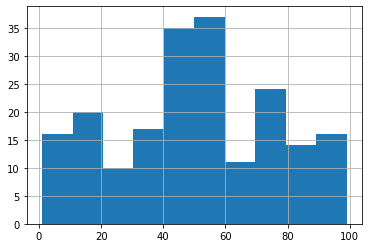

In [73]:
df['Spending Score (1-100)'].hist()

In [74]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


The minimum value fo spending is 1 and maximum is 99.
As we see the data
a. Age , mean is 38.15 while std is 13.96
b. Annual Income : mean is 60.56 and std is 26.26
c. Spedning score : Mean is 50.20 while std is 25.82

We can say that the given dataset has high variability

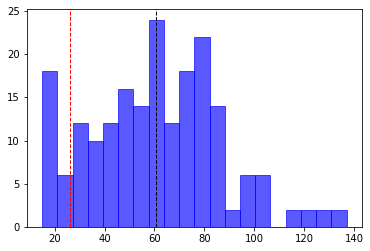

In [75]:
hist=plt.hist(df['Annual Income (k$)'], bins=20, color='b', edgecolor='b', alpha=0.65)
plt.axvline(df['Annual Income (k$)'].mean(),color='k', linestyle='dashed', linewidth=1)
plt.axvline(df['Annual Income (k$)'].std(),color='r', linestyle='dashed', linewidth=1)

BLack dashed line : Mean of the feature 'Annual Income'
Red Dashed Line : Standard Deviation for the feature 'Annual Income'

As we see more then 20 customer have concentrated near the number 60 which is mean.

The variability and the size of the data are important in clustering analysis because distance measurements of most clustering algorithms are sensitive to data magnitudes. The difference in size can change the clustering results by making one point seem closer or more distant to another than it actually is, distorting the actual grouping of data.

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [77]:
#Finding the information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


As we see the only the Genre has dtype as object rest others are integer.

Lets find out the distinct data availabe in the column 'Gender"

In [78]:
df['Genre'].value_counts().reset_index()

,index,Genre
0,Female,112
1,Male,88


In [79]:
#Finding the percentage of shares by gender
df.Genre.value_counts(normalize=True).reset_index()

,index,Genre
0,Female,0.56
1,Male,0.44


<BarContainer object of 200 artists>

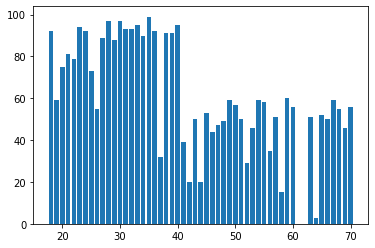

In [80]:
plt.bar(df['Age'],df['Spending Score (1-100)'])

Our dataset contains 56% women and 44 percent men.

#  Encoding Variables and Feature Engineering 

Let's strtrt by divinding the age into groups of 10, 20-30, 40-50 etc.
To do this we cab use Pandas cut() method to divide to bin

In [81]:
intervals = [15, 20, 30, 40, 50, 60, 70]
data=df.Age
df['Age Groups']=pd.cut(x=data,bins=intervals)


In [82]:
df['Age Groups'].value_counts().reset_index()

,index,Age Groups
0,"(30, 40]",60
1,"(20, 30]",45
2,"(40, 50]",38
3,"(50, 60]",23
4,"(15, 20]",17
5,"(60, 70]",17


In [83]:
# FInding the unique catogires in the columns 'Age Group'
df['Age Groups'].value_counts().reset_index()

,index,Age Groups
0,"(30, 40]",60
1,"(20, 30]",45
2,"(40, 50]",38
3,"(50, 60]",23
4,"(15, 20]",17
5,"(60, 70]",17


At this momnet we have teo catogerical variables AGE and Genre, whcihwe need to transform into numbers.

In [84]:
df_OH=pd.get_dummies(df)
df_OH

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Genre_Female,Genre_Male,"Age Groups_(15, 20]","Age Groups_(20, 30]","Age Groups_(30, 40]","Age Groups_(40, 50]","Age Groups_(50, 60]","Age Groups_(60, 70]"
0,1,19,15,39,0,1,1,0,0,0,0,0
1,2,21,15,81,0,1,0,1,0,0,0,0
2,3,20,16,6,1,0,1,0,0,0,0,0
3,4,23,16,77,1,0,0,1,0,0,0,0
4,5,31,17,40,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,35,120,79,1,0,0,0,1,0,0,0
196,197,45,126,28,1,0,0,0,0,1,0,0
197,198,32,126,74,0,1,0,0,1,0,0,0
198,199,32,137,18,0,1,0,0,1,0,0,0


As we see here the columsn Genre is tranformed into Genre_Male and Genre_Female as well column 'Age Groups' in transformed to 6 other columns.


## Dimensionality Reduction & Plotting

Before proceeding ahead, we have a dummy column 'Customer ID.
We will drop the Customer_Id.

In [85]:
#df=df.dro('CustomerID',axis=1,inplace=True)
df=df.drop('CustomerID',axis=1)

In [86]:
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100),Age Groups
0,Male,19,15,39,"(15, 20]"
1,Male,21,15,81,"(20, 30]"
2,Female,20,16,6,"(15, 20]"
3,Female,23,16,77,"(20, 30]"
4,Female,31,17,40,"(30, 40]"


Since plotting 10 dimensions are bit impossible , we will go with Seaborn Pairplot graph.

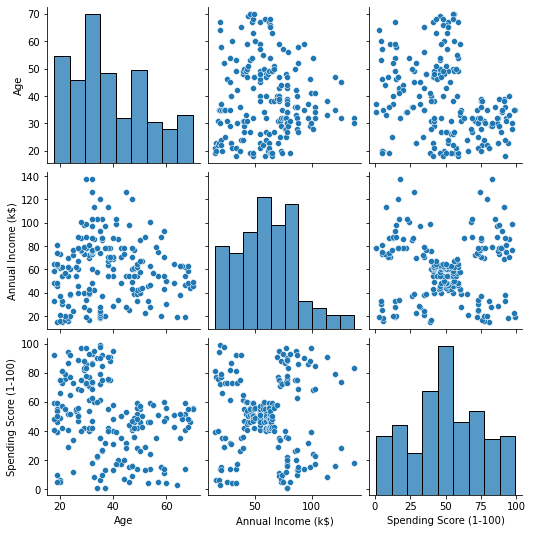

In [87]:
sns.pairplot(df)

If you observer the graph it seems intresting about scatter plot between two features 'Annual Income' and 'Spending Score'

We can see two distinct concentrations of the points in Spending score and Age.

Both scater plots of 'Annual Income' and 'Spending Score' are important

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

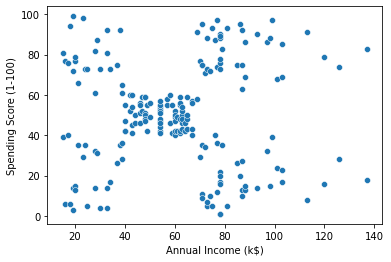

In [88]:
sns.scatterplot(x=df['Annual Income (k$)'],
                y=df['Spending Score (1-100)'])

By looking closer, we can definitely distinguish 5 different groups of data. It seems our customers can be clustered based on how much they make in a year and how much they spend.


### Applying PCA for dimensionality eeduction

Before applying PCA we need to delete the column 'AGE' as we have column 'Age Groups'.

In [89]:
df_OH.shape

(200, 12)

In [91]:
df_OH.columns

Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Genre_Female', 'Genre_Male', 'Age Groups_(15, 20]',
       'Age Groups_(20, 30]', 'Age Groups_(30, 40]', 'Age Groups_(40, 50]',
       'Age Groups_(50, 60]', 'Age Groups_(60, 70]'],
      dtype='object')

In [93]:
df_OH=df_OH.drop(['CustomerID','Age'],axis=1)
df_OH.shape

(200, 10)

In [96]:
pca=PCA(n_components=10)
pcs=pca.fit_transform(df_OH)

<AxesSubplot:>

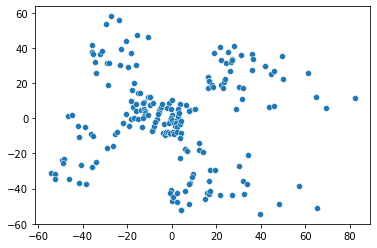

In [97]:
pc1_values = pcs[:,0]
pc2_values = pcs[:,1]
sns.scatterplot(x=pc1_values, y=pc2_values)

The data plot after PCA is very similar to tje plot using only two columns of  the data without PCA.

### Visualizing Hierarchical Structure with Dendrograms

In [98]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

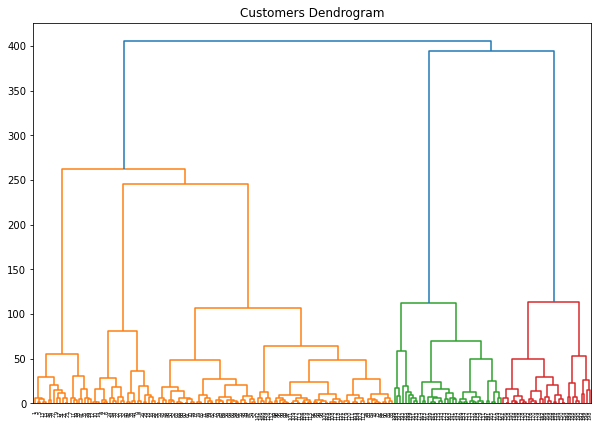

In [110]:
plt.figure(figsize=(10, 7))
plt.title("Customers Dendrogram")


selected_data = df_OH.iloc[:, 0:2]
clusters = shc.linkage(selected_data, 
            method='ward', 
            metric="euclidean")
shc.dendrogram(Z=clusters)
plt.show()

Finding the intresting number of dendrogram is same as finding the largest horizantal space.

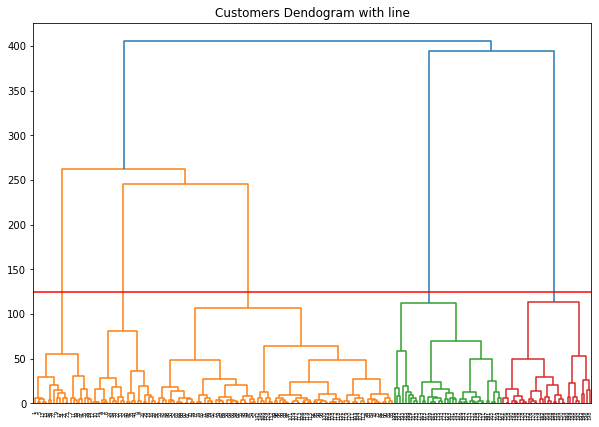

In [111]:
plt.figure(figsize=(10, 7))
plt.title("Customers Dendogram with line")
clusters = shc.linkage(selected_data, 
            method='ward', 
            metric="euclidean")
shc.dendrogram(clusters)
plt.axhline(y = 125, color = 'r', linestyle = '-')

### Implementing an Agglomerative Hierarchical Clustering

In [112]:
from sklearn.cluster import AgglomerativeClustering

clustering_model = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
clustering_model.fit(selected_data)
clustering_model.labels_

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

In [122]:
data_labels = clustering_model.labels_

#### Fitting the data which is filtered by PCA 

In [121]:
model_pca = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
model_pca.fit(pcs)

data_labels_pca = model_pca.labels_



C:\Users\Jeetr\AppData\Local\Temp/ipykernel_10680/2382009407.py:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


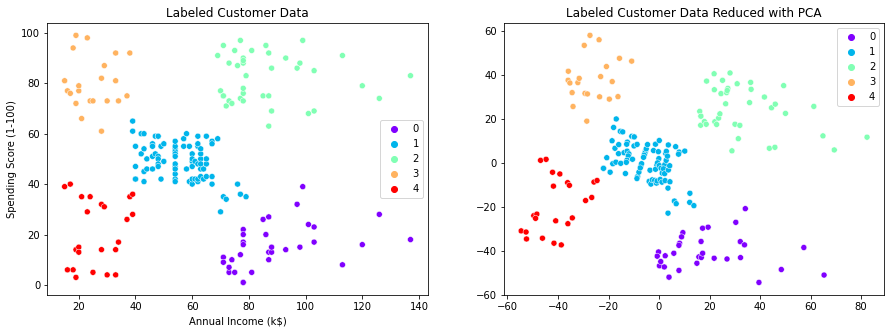

In [130]:
fig, ax =plt.subplots(1,2,figsize=(15, 5))

sns.scatterplot(x='Annual Income (k$)', 
                y='Spending Score (1-100)', 
                data=selected_data, 
                hue=data_labels,
                palette='rainbow',
                ax=ax[0]
               ).set_title('Labeled Customer Data')

sns.scatterplot(x=pc1_values, 
                y=pc2_values,
                hue=data_labels_pca,
                palette="rainbow",
               ax=ax[1]).set_title('Labeled Customer Data Reduced with PCA')

fig.show()

Here we have final clusterized data.

Data points with label: 0(purple) belong to the customers with high salaries but low spending. These are the customers that spend their money carefully.

Points with label: 2(green), are the customers with high salaries and high spending. These are the type of customers that companies target.

The customers in the middle label: 1(blue) are the ones with average income and average spending. The highest numbers of customers belong to this category. Companies can also target these customers given the fact that they are in huge numbers.

The customers in label: 4(red) are the customers that have low salaries and low spending, they might be attracted by offering promotions.

The customers in label: 3(Orange) are the ones with high income and low spending, which are ideally targeted by marketing.